# Predicting Computer Price

### Importing required libraries

In [197]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Read the dataset

In [198]:
data = pd.read_csv("Computers.csv") # loading thge dataset

In [199]:
data.head() #displaying first 5 rows

Unnamed: 0  price  speed   hd  ram  screen  cd multi premium  ads  trend
0           1   1499     25   80    4      14  no    no     yes   94      1
1           2   1795     33   85    2      14  no    no     yes   94      1
2           3   1595     25  170    4      15  no    no     yes   94      1
3           4   1849     25  170    8      14  no    no      no   94      1
4           5   3295     33  340   16      14  no    no     yes   94      1

In [200]:
data.tail() #displaying last 5 rows

Unnamed: 0  price  speed    hd  ram  screen   cd multi premium  ads  \
6254        6255   1690    100   528    8      15   no    no     yes   39   
6255        6256   2223     66   850   16      15  yes   yes     yes   39   
6256        6257   2654    100  1200   24      15  yes    no     yes   39   
6257        6258   2195    100   850   16      15  yes    no     yes   39   
6258        6259   2490    100   850   16      17  yes    no     yes   39   

      trend  
6254     35  
6255     35  
6256     35  
6257     35  
6258     35

In [201]:
data.info() #It gives the overview of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
Unnamed: 0    6259 non-null int64
price         6259 non-null int64
speed         6259 non-null int64
hd            6259 non-null int64
ram           6259 non-null int64
screen        6259 non-null int64
cd            6259 non-null object
multi         6259 non-null object
premium       6259 non-null object
ads           6259 non-null int64
trend         6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [202]:
data.describe() #It gives the summary of the data

Unnamed: 0        price        speed           hd          ram  \
count  6259.000000  6259.000000  6259.000000  6259.000000  6259.000000   
mean   3130.000000  2219.576610    52.011024   416.601694     8.286947   
std    1806.961999   580.803956    21.157735   258.548445     5.631099   
min       1.000000   949.000000    25.000000    80.000000     2.000000   
25%    1565.500000  1794.000000    33.000000   214.000000     4.000000   
50%    3130.000000  2144.000000    50.000000   340.000000     8.000000   
75%    4694.500000  2595.000000    66.000000   528.000000     8.000000   
max    6259.000000  5399.000000   100.000000  2100.000000    32.000000   

            screen          ads        trend  
count  6259.000000  6259.000000  6259.000000  
mean     14.608723   221.301007    15.926985  
std       0.905115    74.835284     7.873984  
min      14.000000    39.000000     1.000000  
25%      14.000000   162.500000    10.000000  
50%      14.000000   246.000000    16.000000  
75%      15.000000   275.000000    21.500000  
max      17.000000   339.000000    35.000000

In [203]:
data.isnull().sum() #checking for null values

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

There is no null values present in the dataset

In [204]:
data.columns #displaying the column names

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [205]:
np.var(data['price']) #calculating the variance in the target variable


337279.33919406397

In [206]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True) #Dropping the unwanted column(Unnamed)

In [207]:
data.head()

price  speed   hd  ram  screen  cd multi premium  ads  trend
0   1499     25   80    4      14  no    no     yes   94      1
1   1795     33   85    2      14  no    no     yes   94      1
2   1595     25  170    4      15  no    no     yes   94      1
3   1849     25  170    8      14  no    no      no   94      1
4   3295     33  340   16      14  no    no     yes   94      1

In [208]:
data.shape

(6259, 10)

Dataset having 6259 rows and 10 columns. Price is the target variable.

## Label Encoding

cd,muti and premium columns are categorical so we need to the labelcoding for those columns.

In [209]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["cd"] = le.fit_transform(data["cd"])
data["multi"] = le.fit_transform(data["multi"])
data["premium"] = le.fit_transform(data["premium"])

In [210]:
data['cd'] = data['cd'].astype('category')
data['multi'] = data['multi'].astype('category')
data['premium'] = data['premium'].astype('category')

#### Splitting the categorical and numerical columns

In [211]:
cat_var = []
num_var = []


for col in data:
    dt = data[col].dtype
    if dt == 'int64' or dt == 'float64':
        num_var.append(col)
    else:
        cat_var.append(col)
    

In [212]:
df_cat = data[cat_var]
df_num = data[num_var]
df_num.head()

price  speed   hd  ram  screen  ads  trend
0   1499     25   80    4      14   94      1
1   1795     33   85    2      14   94      1
2   1595     25  170    4      15   94      1
3   1849     25  170    8      14   94      1
4   3295     33  340   16      14   94      1

In [213]:
df_num.head(2)

price  speed  hd  ram  screen  ads  trend
0   1499     25  80    4      14   94      1
1   1795     33  85    2      14   94      1

### Data Visualization

(0, 100)

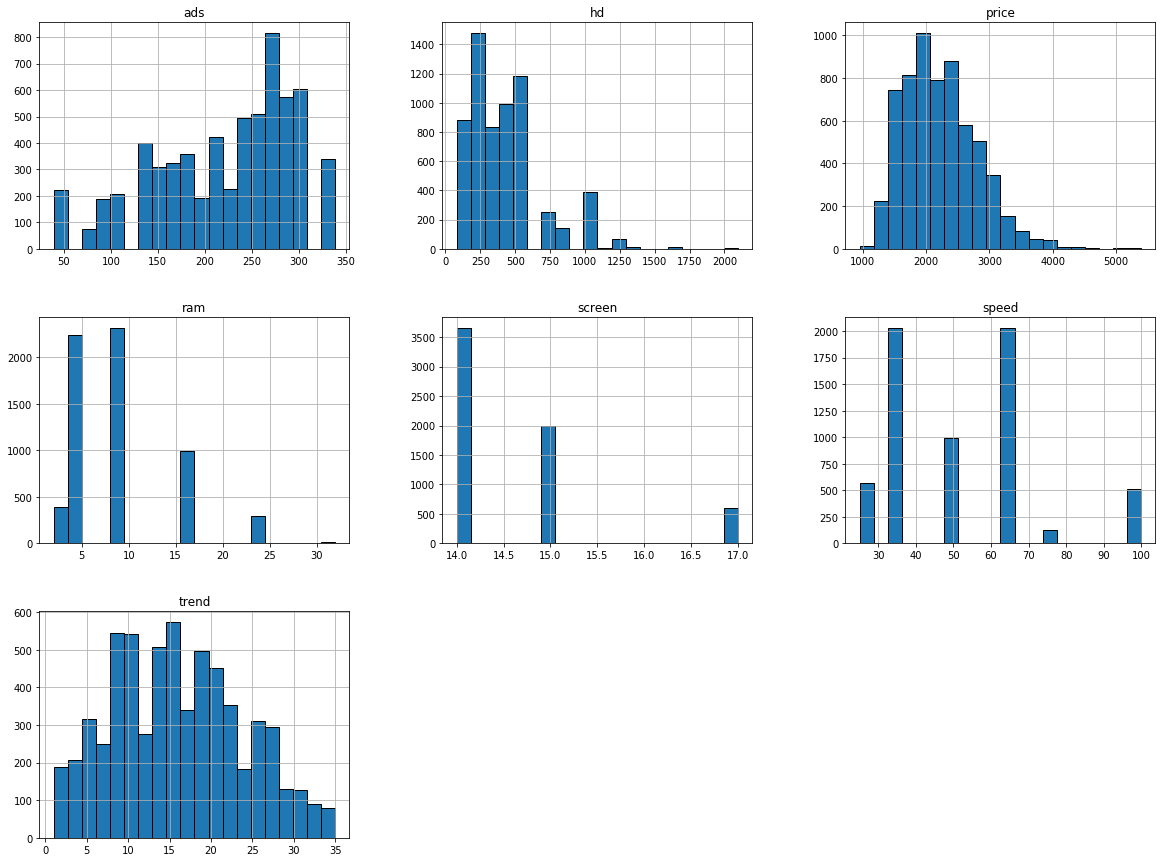

In [214]:
# Histogram of each numerical feature
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
ax_list = df_num.hist(figsize=(20,15),bins=20)
ax_list[2,1].set_xlim((0,100))

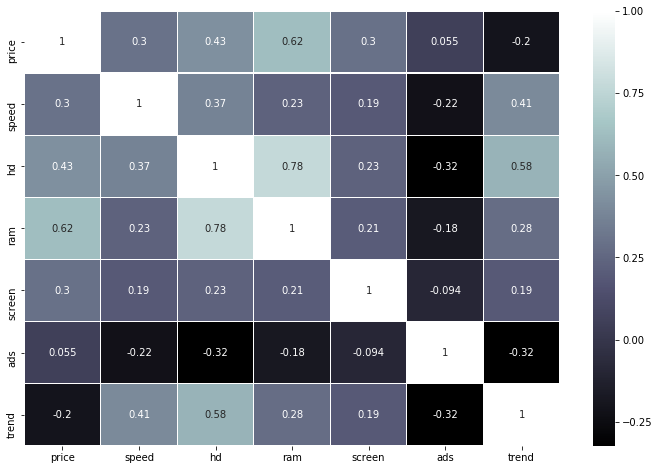

In [215]:
#Correlation plot for numerical data
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(),annot=True,cmap='bone',linewidths=0.25)

In [216]:
df_cat.head(2)

cd multi premium
0  0     0       1
1  0     0       1

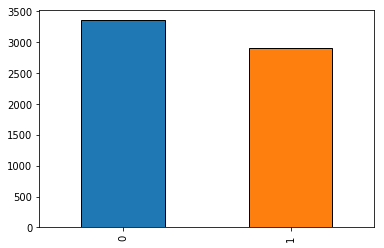

In [217]:
#foer categorical values
df_cat['cd'].value_counts().plot.bar()

###### '0' means 'no' and '1' means 'yes'

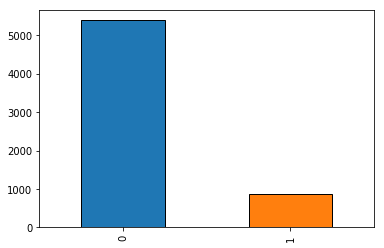

In [218]:
df_cat['multi'].value_counts().plot.bar()

###### '0' means 'no' and '1' means 'yes'5

In [219]:
df_num.drop(['price'], axis = 1, inplace = True) #price is the target variable.So we dont want to standardize that column.

### Standardization

In [220]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_num_scaled = sc.fit_transform(df_num)

In [221]:
df_num_scaled = pd.DataFrame(df_num_scaled) #df_num_scaled in array.so here converting the array into dataframe.

In [222]:
df_final = pd.concat([df_num_scaled, df_cat, data['price']], axis = 1, ignore_index = False) # after standardization concating the dataframes which are required

In [223]:
df_final.rename(columns = {0:'speed',1:'hd', 2:'ram', 3:'screen', 4:'ads', 5:'trends'},inplace = True) #Renaming the column names

In [224]:
df_final.isnull().sum()

speed      0
hd         0
ram        0
screen     0
ads        0
trends     0
cd         0
multi      0
premium    0
price      0
dtype: int64

In [225]:
df_final.head()

speed        hd       ram    screen       ads    trends cd multi  \
0 -1.276752 -1.301994 -0.761359 -0.672591 -1.701219 -1.895886  0     0   
1 -0.898610 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
2 -1.276752 -0.953869 -0.761359  0.432329 -1.701219 -1.895886  0     0   
3 -1.276752 -0.953869 -0.050962 -0.672591 -1.701219 -1.895886  0     0   
4 -0.898610 -0.296300  1.369834 -0.672591 -1.701219 -1.895886  0     0   

  premium  price  
0       1   1499  
1       1   1795  
2       1   1595  
3       0   1849  
4       1   3295

### Splitting the dataset into features and target variable

In [226]:
X = df_final.drop(columns = ['price']) # 'X' is the Independent variable
Y = df_final['price'] # 'Y' is the dependent variable

### Splitting the dataset into train and test

In [227]:
from sklearn.model_selection import train_test_split #It is used to split our dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.21, random_state = 211) #test size is 21%

In [228]:
#checking the shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4944, 9)
(1315, 9)
(4944,)
(1315,)


## Model Building 

### Linear Regression (iteration without loop)

In [229]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #fitting in train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [230]:
pred1 = regressor.predict(X_test) #predict on test set
pred1
print("pred1 :", pred1)
print("pred1.shape :",pred1.shape )

pred1 : [2059.68243618 2487.52518121 2092.49237766 ... 2202.94289562 2105.21664407
 2390.20510836]
pred1.shape : (1315,)


In [231]:
Y_test.head()

4965    2345
1016    2395
915     1990
1111    1894
2873    1525
Name: price, dtype: int64

In [232]:
X_train1, X_test1, Y_train1, Y_test1  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 301) #1st iteration.Here we are using X_train and Y_train for splittind and test size 25%.

In [233]:
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(3708, 9)
(1236, 9)
(3708,)
(1236,)


In [234]:
regressor1= LinearRegression()
regressor1.fit(X_train1, Y_train1)
# pred1=regressor1.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [235]:
Predictions = []

In [236]:
sample1=regressor1.predict(X_test)
sample1
Predictions.append(sample1)

In [237]:
dict1 = {}

In [238]:
X_train2, X_test2, Y_train2, Y_test2  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 300) #2nd iteration

In [239]:
regressor2 = LinearRegression()
regressor2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [240]:
sample2=regressor2.predict(X_test)
Predictions.append(sample2)

In [241]:
X_train3, X_test3, Y_train3, Y_test3  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 302) #3rd iteration


In [242]:
regressor3 = LinearRegression()
regressor3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [243]:
Predictions

[array([2056.80193325, 2484.98617121, 2089.5648593 , ..., 2194.86935171,
        2103.98902619, 2380.15881189]),
 array([2052.68175738, 2490.91878018, 2088.61027967, ..., 2204.81157214,
        2106.38428572, 2395.70875699])]

In [244]:
sample3=regressor3.predict(X_test)
Predictions.append(sample3)

In [245]:
X_train4, X_test4, Y_train4, Y_test4  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 210)

In [246]:
regressor4 = LinearRegression()
regressor4.fit(X_train4, Y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [247]:
sample4=regressor4.predict(X_test)
Predictions.append(sample4)

In [248]:
X_train5, X_test5, Y_train5, Y_test5  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 220) # 4th iteration

In [249]:
regressor5 = LinearRegression()
regressor5.fit(X_train5, Y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [250]:
sample5=regressor5.predict(X_test)
Predictions.append(sample5)

In [251]:
X_train6, X_test6, Y_train6, Y_test6  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 120)

In [252]:
regressor6= LinearRegression()
regressor6.fit(X_train6, Y_train6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [253]:
sample6=regressor6.predict(X_test)
Predictions.append(sample6)

In [254]:
X_train7, X_test7, Y_train7, Y_test7  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 121)

In [255]:
regressor7= LinearRegression()
regressor7.fit(X_train7, Y_train7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
sample7=regressor7.predict(X_test)
Predictions.append(sample7)

In [257]:
X_train8, X_test8, Y_train8, Y_test8  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 111)

In [258]:
regressor8= LinearRegression()
regressor8.fit(X_train8, Y_train8)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [259]:
sample8=regressor8.predict(X_test)
Predictions.append(sample8)

In [260]:
X_train9, X_test9, Y_train9, Y_test9  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 211)

In [261]:
regressor9= LinearRegression()
regressor9.fit(X_train9, Y_train9)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
sample9=regressor9.predict(X_test)
Predictions.append(sample9)

In [263]:
X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 221)

In [264]:
regressor10= LinearRegression()
regressor10.fit(X_train10, Y_train10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Building (using loop)

## Linear Regression

In [265]:
seed_values = [0,1,2,3,4,5,6,7,8,9] #setting seed values

In [266]:
from sklearn.metrics import r2_score
def metric(true,predicted):
    return r2_score(true,predicted)

In [267]:
predictions_df_lr = pd.DataFrame(index=Y_test.index)
model_lr = "model_lr"
count=0
for i in range(10):
    Predictions = []
    X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = seed_values[i])
    if count<1:
        print("\nSeed Value=",i)
        print(X_train10)
        print("\n",Y_train10)
        count += 1
    regressor10= LinearRegression()
    regressor10.fit(X_train10, Y_train10)
    sample10=regressor10.predict(X_test)
    print("Model_lr_"+str(i),":",metric(Y_test,sample10))
    predictions_df_lr[model_lr+str(i)] = sample10
    
predictions_df_lr['Y_test'] = Y_test
#predictions_df_lr.to_csv('predictions_df_lr.csv',header = True,index=False)
predictions_df_lr.head(10)


Seed Value= 0
         speed        hd       ram    screen       ads    trends cd multi  \
4550 -0.898610  2.256617  2.790629  0.432329 -0.217843  0.644327  1     0   
7    -0.095057 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
663  -0.898610 -0.783675 -0.761359  0.432329 -0.605391 -1.260833  0     0   
328   0.661228 -0.296300  1.369834 -0.672591 -1.514126 -1.514854  0     0   
296  -0.898610 -0.644425 -0.050962 -0.672591 -1.514126 -1.514854  0     0   
2617 -0.898610 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  1     1   
2201 -0.898610  0.028617 -0.761359  2.642169  0.717620 -0.498769  0     0   
3917  2.268334  2.256617  2.790629 -0.672591  0.690892  0.263295  1     0   
5935  0.661228  2.256617 -0.050962 -0.672591 -1.233487  1.660412  1     0   
1235 -0.095057  0.477312  1.369834 -0.672591  1.024986 -1.006812  0     0   
3342 -0.095057  0.032485 -0.050962  0.432329  1.145260  0.009274  1     0   
4408  0.661228  0.427027  1.369834  0.432329  0.356799  0.517

model_lr0    model_lr1    model_lr2    model_lr3    model_lr4  \
4965  2055.320790  2057.536907  2063.622012  2057.294658  2048.949972   
1016  2493.498865  2486.807075  2488.862642  2481.149778  2494.683977   
915   2086.680804  2087.355208  2096.933811  2082.547427  2082.969334   
1111  1850.469504  1852.121009  1853.243386  1857.096361  1850.819702   
2873  1688.767867  1685.368410  1686.387674  1677.663621  1688.051419   
2139  2142.838998  2136.861578  2147.056924  2145.864527  2135.556794   
3306  1975.755089  1969.447547  1969.769868  1962.451535  1968.752900   
6197  2132.960261  2127.074254  2141.351492  2128.258053  2128.654692   
6011  1938.641430  1933.048703  1936.948868  1935.108610  1927.523008   
6182  3009.307922  3007.059317  3014.139891  3006.679081  3001.311473   

        model_lr5    model_lr6    model_lr7    model_lr8    model_lr9  Y_test  
4965  2060.176319  2054.306824  2057.679323  2063.863045  2058.138314    2345  
1016  2486.810124  2493.714743  2491.143165  2482.560707  2487.849027    2395  
915   2092.436702  2092.350911  2094.507070  2084.257824  2095.402651    1990  
1111  1849.687077  1858.103806  1851.837154  1859.015354  1851.397528    1894  
2873  1681.943252  1689.272830  1694.081083  1682.182486  1677.643351    1525  
2139  2151.031780  2141.994794  2113.202539  2150.118256  2144.443824    1798  
3306  1965.197175  1972.900651  1979.162622  1966.215173  1961.124963    1595  
6197  2147.816285  2129.550076  2135.873517  2137.230384  2135.358117    2223  
6011  1945.823178  1938.258872  1934.844639  1940.500020  1937.850113    1699  
6182  3017.141079  2997.643055  2994.836456  3010.857063  3011.898250    2844

# Decision Tree

In [268]:
predictions_df_dt = pd.DataFrame(index=Y_test.index)
model_dt = "model_DT"
count=0
for i in range(10):
    Predictions = []
    X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = seed_values[i])
    if count<4:
        print("\nSeed Value=",i)
        print(X_train10)
        print("\n",Y_train10)
        count += 1
    regressor_dt= DecisionTreeRegressor()
    regressor_dt.fit(X_train10, Y_train10)
    sample10=regressor_dt.predict(X_test)
    print("Model_DT_"+str(i),":",metric(Y_test,sample10))
    predictions_df_dt[model_dt+str(i)] = sample10
predictions_df_dt['Y_test'] = Y_test
#predictions_df_dt.to_csv('predictions_df_dt.csv',header = True,index=False)
predictions_df_dt.head(10)


Seed Value= 0
         speed        hd       ram    screen       ads    trends cd multi  \
4550 -0.898610  2.256617  2.790629  0.432329 -0.217843  0.644327  1     0   
7    -0.095057 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
663  -0.898610 -0.783675 -0.761359  0.432329 -0.605391 -1.260833  0     0   
328   0.661228 -0.296300  1.369834 -0.672591 -1.514126 -1.514854  0     0   
296  -0.898610 -0.644425 -0.050962 -0.672591 -1.514126 -1.514854  0     0   
2617 -0.898610 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  1     1   
2201 -0.898610  0.028617 -0.761359  2.642169  0.717620 -0.498769  0     0   
3917  2.268334  2.256617  2.790629 -0.672591  0.690892  0.263295  1     0   
5935  0.661228  2.256617 -0.050962 -0.672591 -1.233487  1.660412  1     0   
1235 -0.095057  0.477312  1.369834 -0.672591  1.024986 -1.006812  0     0   
3342 -0.095057  0.032485 -0.050962  0.432329  1.145260  0.009274  1     0   
4408  0.661228  0.427027  1.369834  0.432329  0.356799  0.517

[3708 rows x 9 columns]

 3585    2175
3110    1299
316     2399
4829    2044
4038    2499
20      1695
3499    2890
5084    2095
5948    2094
3489    1890
3899    2554
5666    2898
3132    2499
1507    2090
658     2520
376     2695
211     3135
1884    2990
888     2094
393     1399
5979    2154
572     1699
1690    2394
3512    1590
1523    1299
1041    1890
270     2095
1726    2194
2597    1390
5748    1245
        ... 
4802    1645
14      2699
3289    2090
3027    2044
2760    1295
5253    3140
3144    2690
5935    1815
5229    2290
4331    2090
2196    3399
1321    2144
5551    2699
6033    2390
33      2475
1397    2998
1950    2244
2342    2185
1217    2799
662     2489
4513    3294
648     1995
3350    1725
3341    1299
2168    2144
2692    2079
3412    2694
1292    3599
3879    2635
6239    3095
Name: price, Length: 3708, dtype: int64
Model_DT_1 : 0.868795924486892

Seed Value= 2
         speed        hd       ram    screen       ads    trends cd multi  \
1856  0.661228  0.

model_DT0  model_DT1    model_DT2    model_DT3    model_DT4  \
4965  2017.500000     1940.0  2110.000000  2295.000000  2195.000000   
1016  2559.333333     2567.0  2559.333333  2559.333333  2559.333333   
915   1990.000000     2094.0  2059.333333  2044.000000  2059.333333   
1111  1694.000000     1694.0  1694.000000  1694.000000  1694.000000   
2873  1399.000000     1699.0  1625.000000  1699.000000  1699.000000   
2139  1559.000000     1709.0  1709.000000  1709.000000  1709.000000   
3306  1499.000000     1399.0  1499.000000  1655.000000  1399.000000   
6197  2124.500000     2219.5  2197.666667  2197.666667  2197.666667   
6011  1847.666667     1699.0  1699.000000  1699.000000  1873.000000   
6182  2624.500000     2624.5  2624.500000  2624.500000  2624.500000   

        model_DT5    model_DT6  model_DT7  model_DT8    model_DT9  Y_test  
4965  2295.000000  2110.000000     1895.0     1940.0  2110.000000    2345  
1016  2594.000000  2559.333333     2517.0     2517.0  2559.333333    2395  
915   2059.333333  2144.000000     2094.0     1890.0  2067.000000    1990  
1111  1694.000000  1694.000000     1694.0     1694.0  1694.000000    1894  
2873  1699.000000  1699.000000     1699.0     1699.0  1699.000000    1525  
2139  1709.000000  1709.000000     1709.0     1599.0  1709.000000    1798  
3306  1655.000000  1655.000000     1399.0     1655.0  1765.000000    1595  
6197  2219.500000  2197.666667     2223.0     2223.0  2124.500000    2223  
6011  1873.000000  1847.666667     1873.0     1699.0  1873.000000    1699  
6182  2595.000000  2654.000000     2624.5     2624.5  2624.500000    2844

### Random Forest

In [269]:
predictions_df_rf = pd.DataFrame(index=Y_test.index)
model_rf = "model_RF"
count=0
for i in range(10):
    Predictions = []
    X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = seed_values[i])
    if count<4:
        print("\nSeed Value=",i)
        print(X_train10)
        print("\n",Y_train10)
        count += 1
    regressor_rf= RandomForestRegressor()
    regressor_rf.fit(X_train10, Y_train10)
    sample10=regressor_rf.predict(X_test)
    print("Model_RF_"+str(i),":",metric(Y_test,sample10))
    predictions_df_rf[model_rf+str(i)] = sample10
    
predictions_df_rf['Y_test'] = Y_test    
#predictions_df_rf.to_csv('predictions_df_rf.csv',header = True,index=False)
predictions_df_rf.head(10)


Seed Value= 0
         speed        hd       ram    screen       ads    trends cd multi  \
4550 -0.898610  2.256617  2.790629  0.432329 -0.217843  0.644327  1     0   
7    -0.095057 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
663  -0.898610 -0.783675 -0.761359  0.432329 -0.605391 -1.260833  0     0   
328   0.661228 -0.296300  1.369834 -0.672591 -1.514126 -1.514854  0     0   
296  -0.898610 -0.644425 -0.050962 -0.672591 -1.514126 -1.514854  0     0   
2617 -0.898610 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  1     1   
2201 -0.898610  0.028617 -0.761359  2.642169  0.717620 -0.498769  0     0   
3917  2.268334  2.256617  2.790629 -0.672591  0.690892  0.263295  1     0   
5935  0.661228  2.256617 -0.050962 -0.672591 -1.233487  1.660412  1     0   
1235 -0.095057  0.477312  1.369834 -0.672591  1.024986 -1.006812  0     0   
3342 -0.095057  0.032485 -0.050962  0.432329  1.145260  0.009274  1     0   
4408  0.661228  0.427027  1.369834  0.432329  0.356799  0.517

Model_RF_2 : 0.8984236015021183

Seed Value= 3
         speed        hd       ram    screen       ads    trends cd multi  \
5013 -0.095057  2.256617  2.790629  0.432329 -0.404935  0.898348  1     0   
1868 -1.276752  0.430895  1.369834 -0.672591  0.503800 -0.625780  1     1   
1380 -0.095057 -1.108591 -0.761359 -0.672591  0.330071 -0.879801  0     0   
4050 -0.898610  0.036353 -0.761359 -0.672591  0.049432  0.390306  0     0   
1524  0.661228  3.687798 -0.050962 -0.672591  0.824530 -0.752790  0     0   
6199  2.268334  4.577451  4.211424  0.432329 -2.436225  2.295466  1     0   
1132 -0.095057  0.136923 -0.050962 -0.672591  1.024986 -1.006812  1     0   
3391  0.661228 -0.791411 -0.761359 -0.672591  1.145260  0.009274  0     0   
1270 -0.898610 -1.197557 -1.116558 -0.672591  0.330071 -0.879801  0     0   
2063 -0.095057  0.028617 -0.761359 -0.672591  0.717620 -0.498769  0     0   
2786 -0.095057 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  0     0   
5748  0.661228 -0.296300 -0.7

model_RF0    model_RF1    model_RF2    model_RF3    model_RF4  \
4965  2024.141667  1944.775000  2001.081667  2234.500000  2099.700000   
1016  2543.197619  2535.866667  2563.859048  2551.843333  2556.033333   
915   1920.000000  2047.366667  2009.460000  1993.200000  2018.658333   
1111  1744.840000  1759.000000  1712.428571  1694.000000  1707.333333   
2873  1456.625000  1608.600000  1437.480000  1584.022222  1611.600000   
2139  1877.576190  1715.557143  1676.000000  1717.100000  1718.894444   
3306  1756.800000  1573.533333  1705.700000  1516.200000  1633.800000   
6197  2136.225000  2266.550000  2116.600000  2204.816667  2139.720000   
6011  1855.523810  1809.700000  1762.783333  1830.200000  1858.800000   
6182  2628.925000  2625.468333  2632.366667  2614.666667  2623.841667   

        model_RF5    model_RF6    model_RF7    model_RF8    model_RF9  Y_test  
4965  2215.125000  2118.275000  2143.050000  2145.500000  2070.866667    2345  
1016  2589.000000  2569.012857  2502.550000  2546.583333  2547.783333    2395  
915   1968.775000  2031.875000  2056.133333  2012.166667  1983.880000    1990  
1111  1716.550000  1714.100000  1851.533333  1724.000000  1768.600000    1894  
2873  1699.000000  1678.600000  1585.833333  1577.700000  1574.733333    1525  
2139  1697.975000  1692.533333  1678.950000  1662.156667  1719.950000    1798  
3306  1742.466667  1731.733333  1662.300000  1760.300000  1801.600000    1595  
6197  2245.150000  2211.525000  2305.600000  2239.820000  2193.266667    2223  
6011  1795.800000  1791.623333  1830.716667  1733.150000  1779.806667    1699  
6182  2590.900000  2633.433333  2623.516667  2634.726667  2640.650000    2844

### KNN

In [270]:
predictions_df_KNN = pd.DataFrame(index=Y_test.index)
model_KNN = "model_KNN"
count=0
for i in range(10):
    Predictions = []
    X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = seed_values[i])
    if count<4:
        print("\nSeed Value=",i)
        print(X_train10)
        print("\n",Y_train10)
        count += 1
    regressor_KNN= KNeighborsRegressor()
    regressor_KNN.fit(X_train10, Y_train10)
    sample10=regressor_KNN.predict(X_test)
    print("Model_KNN"+str(i),":",metric(Y_test,sample10))
    predictions_df_KNN[model_KNN+str(i)] = sample10
    
predictions_df_KNN['Y_test'] = Y_test
#predictions_df_KNN.to_csv('predictions_df_KNN.csv',header = True,index=False)
predictions_df_KNN.head(10)


Seed Value= 0
         speed        hd       ram    screen       ads    trends cd multi  \
4550 -0.898610  2.256617  2.790629  0.432329 -0.217843  0.644327  1     0   
7    -0.095057 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
663  -0.898610 -0.783675 -0.761359  0.432329 -0.605391 -1.260833  0     0   
328   0.661228 -0.296300  1.369834 -0.672591 -1.514126 -1.514854  0     0   
296  -0.898610 -0.644425 -0.050962 -0.672591 -1.514126 -1.514854  0     0   
2617 -0.898610 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  1     1   
2201 -0.898610  0.028617 -0.761359  2.642169  0.717620 -0.498769  0     0   
3917  2.268334  2.256617  2.790629 -0.672591  0.690892  0.263295  1     0   
5935  0.661228  2.256617 -0.050962 -0.672591 -1.233487  1.660412  1     0   
1235 -0.095057  0.477312  1.369834 -0.672591  1.024986 -1.006812  0     0   
3342 -0.095057  0.032485 -0.050962  0.432329  1.145260  0.009274  1     0   
4408  0.661228  0.427027  1.369834  0.432329  0.356799  0.517

Model_KNN3 : 0.8421810995042146
Model_KNN4 : 0.8422293089832209
Model_KNN5 : 0.8505039057304193
Model_KNN6 : 0.8426434741573087
Model_KNN7 : 0.8476378162132296
Model_KNN8 : 0.8480195374388027
Model_KNN9 : 0.8467314851102137


model_KNN0  model_KNN1  model_KNN2  model_KNN3  model_KNN4  model_KNN5  \
4965      1926.4      1966.4      2065.6      2097.4      2156.6      2037.4   
1016      2713.6      2543.4      2743.4      2713.6      2732.6      2774.2   
915       1947.8      1967.8      1967.8      1890.0      2030.0      1967.8   
1111      1704.8      1744.8      1744.8      1714.0      1744.8      1764.8   
2873      1361.4      1444.6      1353.4      1444.6      1434.2      1500.6   
2139      1958.2      1799.8      1659.8      1737.6      1698.8      1624.2   
3306      1731.2      1876.2      1757.4      1767.2      1876.2      1887.2   
6197      2223.4      2228.2      2223.4      2208.6      2208.6      2208.6   
6011      2052.2      1908.2      2017.4      1947.4      1987.2      1882.4   
6182      2618.6      2618.6      2618.6      2638.6      2628.6      2616.8   

      model_KNN6  model_KNN7  model_KNN8  model_KNN9  Y_test  
4965      1985.6      2124.8      2156.6      1985.6    2345  
1016      2573.2      2682.8      2512.6      2732.6    2395  
915       1947.8      1967.8      1950.0      1967.8    1990  
1111      1764.8      1744.8      1764.8      1694.0    1894  
2873      1453.4      1434.2      1434.2      1453.4    1525  
2139      1653.6      1626.2      1617.8      1678.8    1798  
3306      1855.2      1779.2      1845.4      1799.2    1595  
6197      2208.6      2208.6      2223.4      2208.6    2223  
6011      1947.4      1982.2      1952.4      1947.4    1699  
6182      2628.6      2618.6      2638.6      2616.8    2844

### SVR

In [271]:
predictions_df_SVR = pd.DataFrame(index=Y_test.index)
model_SVR = "model_SVR"
count=0
for i in range(10):
    Predictions = []
    X_train10, X_test10, Y_train10, Y_test10  = train_test_split(X_train, Y_train, test_size = 0.25, random_state = seed_values[i])
    if count<4:
        print("\nSeed Value=",i)
        print(X_train10)
        print("\n",Y_train10)
        count += 1
    regressor_SVR= SVR()
    regressor_SVR.fit(X_train10, Y_train10)
    sample10=regressor_SVR.predict(X_test)
    print("Model_SVR"+str(i),":",metric(Y_test,sample10))
    predictions_df_SVR[model_SVR+str(i)] = sample10
    
predictions_df_SVR['Y_test'] = Y_test
#predictions_df_SVR.to_csv('predictions_df_SVR.csv',header = True,index=False)
predictions_df_SVR.head(10)


Seed Value= 0
         speed        hd       ram    screen       ads    trends cd multi  \
4550 -0.898610  2.256617  2.790629  0.432329 -0.217843  0.644327  1     0   
7    -0.095057 -1.282654 -1.116558 -0.672591 -1.701219 -1.895886  0     0   
663  -0.898610 -0.783675 -0.761359  0.432329 -0.605391 -1.260833  0     0   
328   0.661228 -0.296300  1.369834 -0.672591 -1.514126 -1.514854  0     0   
296  -0.898610 -0.644425 -0.050962 -0.672591 -1.514126 -1.514854  0     0   
2617 -0.898610 -0.783675 -0.761359 -0.672591  0.944804 -0.244748  1     1   
2201 -0.898610  0.028617 -0.761359  2.642169  0.717620 -0.498769  0     0   
3917  2.268334  2.256617  2.790629 -0.672591  0.690892  0.263295  1     0   
5935  0.661228  2.256617 -0.050962 -0.672591 -1.233487  1.660412  1     0   
1235 -0.095057  0.477312  1.369834 -0.672591  1.024986 -1.006812  0     0   
3342 -0.095057  0.032485 -0.050962  0.432329  1.145260  0.009274  1     0   
4408  0.661228  0.427027  1.369834  0.432329  0.356799  0.517

Model_SVR1 : 0.3545665923237936

Seed Value= 2
         speed        hd       ram    screen       ads    trends cd multi  \
1856  0.661228  0.427027 -0.761359  0.432329  0.503800 -0.625780  1     0   
3824  0.661228 -0.783675 -0.761359 -0.672591  0.690892  0.263295  0     0   
77    0.661228 -0.296300 -0.050962  0.432329 -1.701219 -1.895886  1     0   
4698 -0.898610 -0.783675 -0.761359 -0.672591 -0.792484  0.771338  0     0   
902  -0.898610  0.136923  1.369834  0.432329  0.370162 -1.133822  0     0   
1260  0.661228 -1.197557 -1.116558 -0.672591  0.330071 -0.879801  0     0   
5989  2.268334  1.676409 -0.050962 -0.672591 -1.955130  1.787423  1     0   
5247  0.661228  0.477312 -0.050962  0.432329 -0.845939  1.152370  1     0   
3291 -0.095057 -1.197557 -1.116558 -0.672591  1.145260  0.009274  0     0   
1547 -1.276752 -1.197557 -1.116558 -0.672591  0.824530 -0.752790  1     0   
357   0.661228 -0.644425 -0.050962  0.432329 -1.514126 -1.514854  0     0   
3361 -0.898610 -0.791411 -0.7

Model_SVR3 : 0.35043912500150776
Model_SVR4 : 0.3513552629372576
Model_SVR5 : 0.362650341446604
Model_SVR6 : 0.35040389856623866
Model_SVR7 : 0.3546329851162332
Model_SVR8 : 0.35622923626534664
Model_SVR9 : 0.35497339792553007


model_SVR0   model_SVR1   model_SVR2   model_SVR3   model_SVR4  \
4965  2139.674846  2133.360736  2143.276244  2130.622223  2130.278123   
1016  2213.871473  2221.780375  2225.937054  2214.809745  2216.363263   
915   2050.840869  2059.680242  2060.701851  2056.156622  2051.004140   
1111  1982.276756  1990.871269  1990.631125  1984.964541  1979.154995   
2873  1939.920429  1948.768546  1950.776989  1942.172024  1939.110826   
2139  1960.949685  1969.160183  1969.557990  1964.678448  1956.335303   
3306  2090.115007  2094.409261  2095.300689  2081.411925  2082.465160   
6197  2225.369487  2218.890515  2226.212907  2211.722802  2210.476510   
6011  2126.309414  2120.660136  2128.119049  2115.048993  2111.664225   
6182  2309.983259  2306.724593  2307.665297  2294.543880  2294.920471   

       model_SVR5   model_SVR6   model_SVR7   model_SVR8   model_SVR9  Y_test  
4965  2141.536503  2128.814237  2132.822999  2139.689792  2135.139946    2345  
1016  2223.676650  2212.716632  2213.386851  2220.905425  2216.034452    2395  
915   2062.288005  2052.990846  2059.853278  2057.265937  2061.130602    1990  
1111  1985.477137  1980.969512  1990.595477  1987.112570  1985.896851    1894  
2873  1940.850574  1936.589140  1944.445195  1944.879961  1945.245877    1525  
2139  1960.897246  1956.912530  1964.981358  1964.956109  1964.782088    1798  
3306  2094.142758  2089.532082  2085.518841  2093.395758  2089.544803    1595  
6197  2225.364934  2212.036186  2219.970246  2225.617800  2225.064271    2223  
6011  2124.674226  2115.387490  2115.672556  2123.615046  2123.349483    1699  
6182  2309.991658  2299.681948  2309.544993  2307.154014  2311.660418    2844

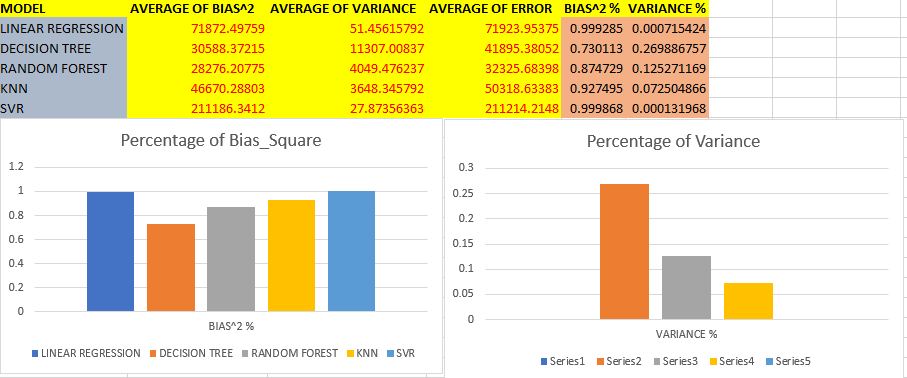

In [272]:
from IPython.display import Image
Image(filename='Capture1.PNG')